In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#reading dataset 
df= pd.read_csv('train_FD001.csv')

In [ ]:
df.shape

(20631, 28)

In [ ]:
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640,NaN,NaN


In [ ]:
# Drop columns based on column index.
df= df.drop(df.columns[[26, 27]],axis = 1)
df.head()  


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [ ]:
df.columns=["engineNumber","cycleNumber","opSetting1","opSetting2","opSetting3","sensor1","sensor2", "sensor3","sensor4","sensor5","sensor6",
"sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16", "sensor17",
"sensor18","sensor19","sensor20","sensor21"]

In [ ]:
df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [ ]:
#checking for Null values
df.isnull().sum()

engineNumber    0
cycleNumber     0
opSetting1      0
opSetting2      0
opSetting3      0
sensor1         0
sensor2         0
sensor3         0
sensor4         0
sensor5         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
sensor10        0
sensor11        0
sensor12        0
sensor13        0
sensor14        0
sensor15        0
sensor16        0
sensor17        0
sensor18        0
sensor19        0
sensor20        0
sensor21        0
dtype: int64

In [ ]:
df.describe()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
max_cycles_df = df.groupby(["engineNumber"], sort=False)["cycleNumber"].max().reset_index().rename(columns={"CyclecycleNumber" : "MaxCycle_engineNumber"})
max_cycles_df

,engineNumber,cycleNumber
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [ ]:
#checking the unique entries in operational setting 3
np.unique(df['opSetting3'])

array([100])

As there is only one unique value in operational setting 3, we can drop it

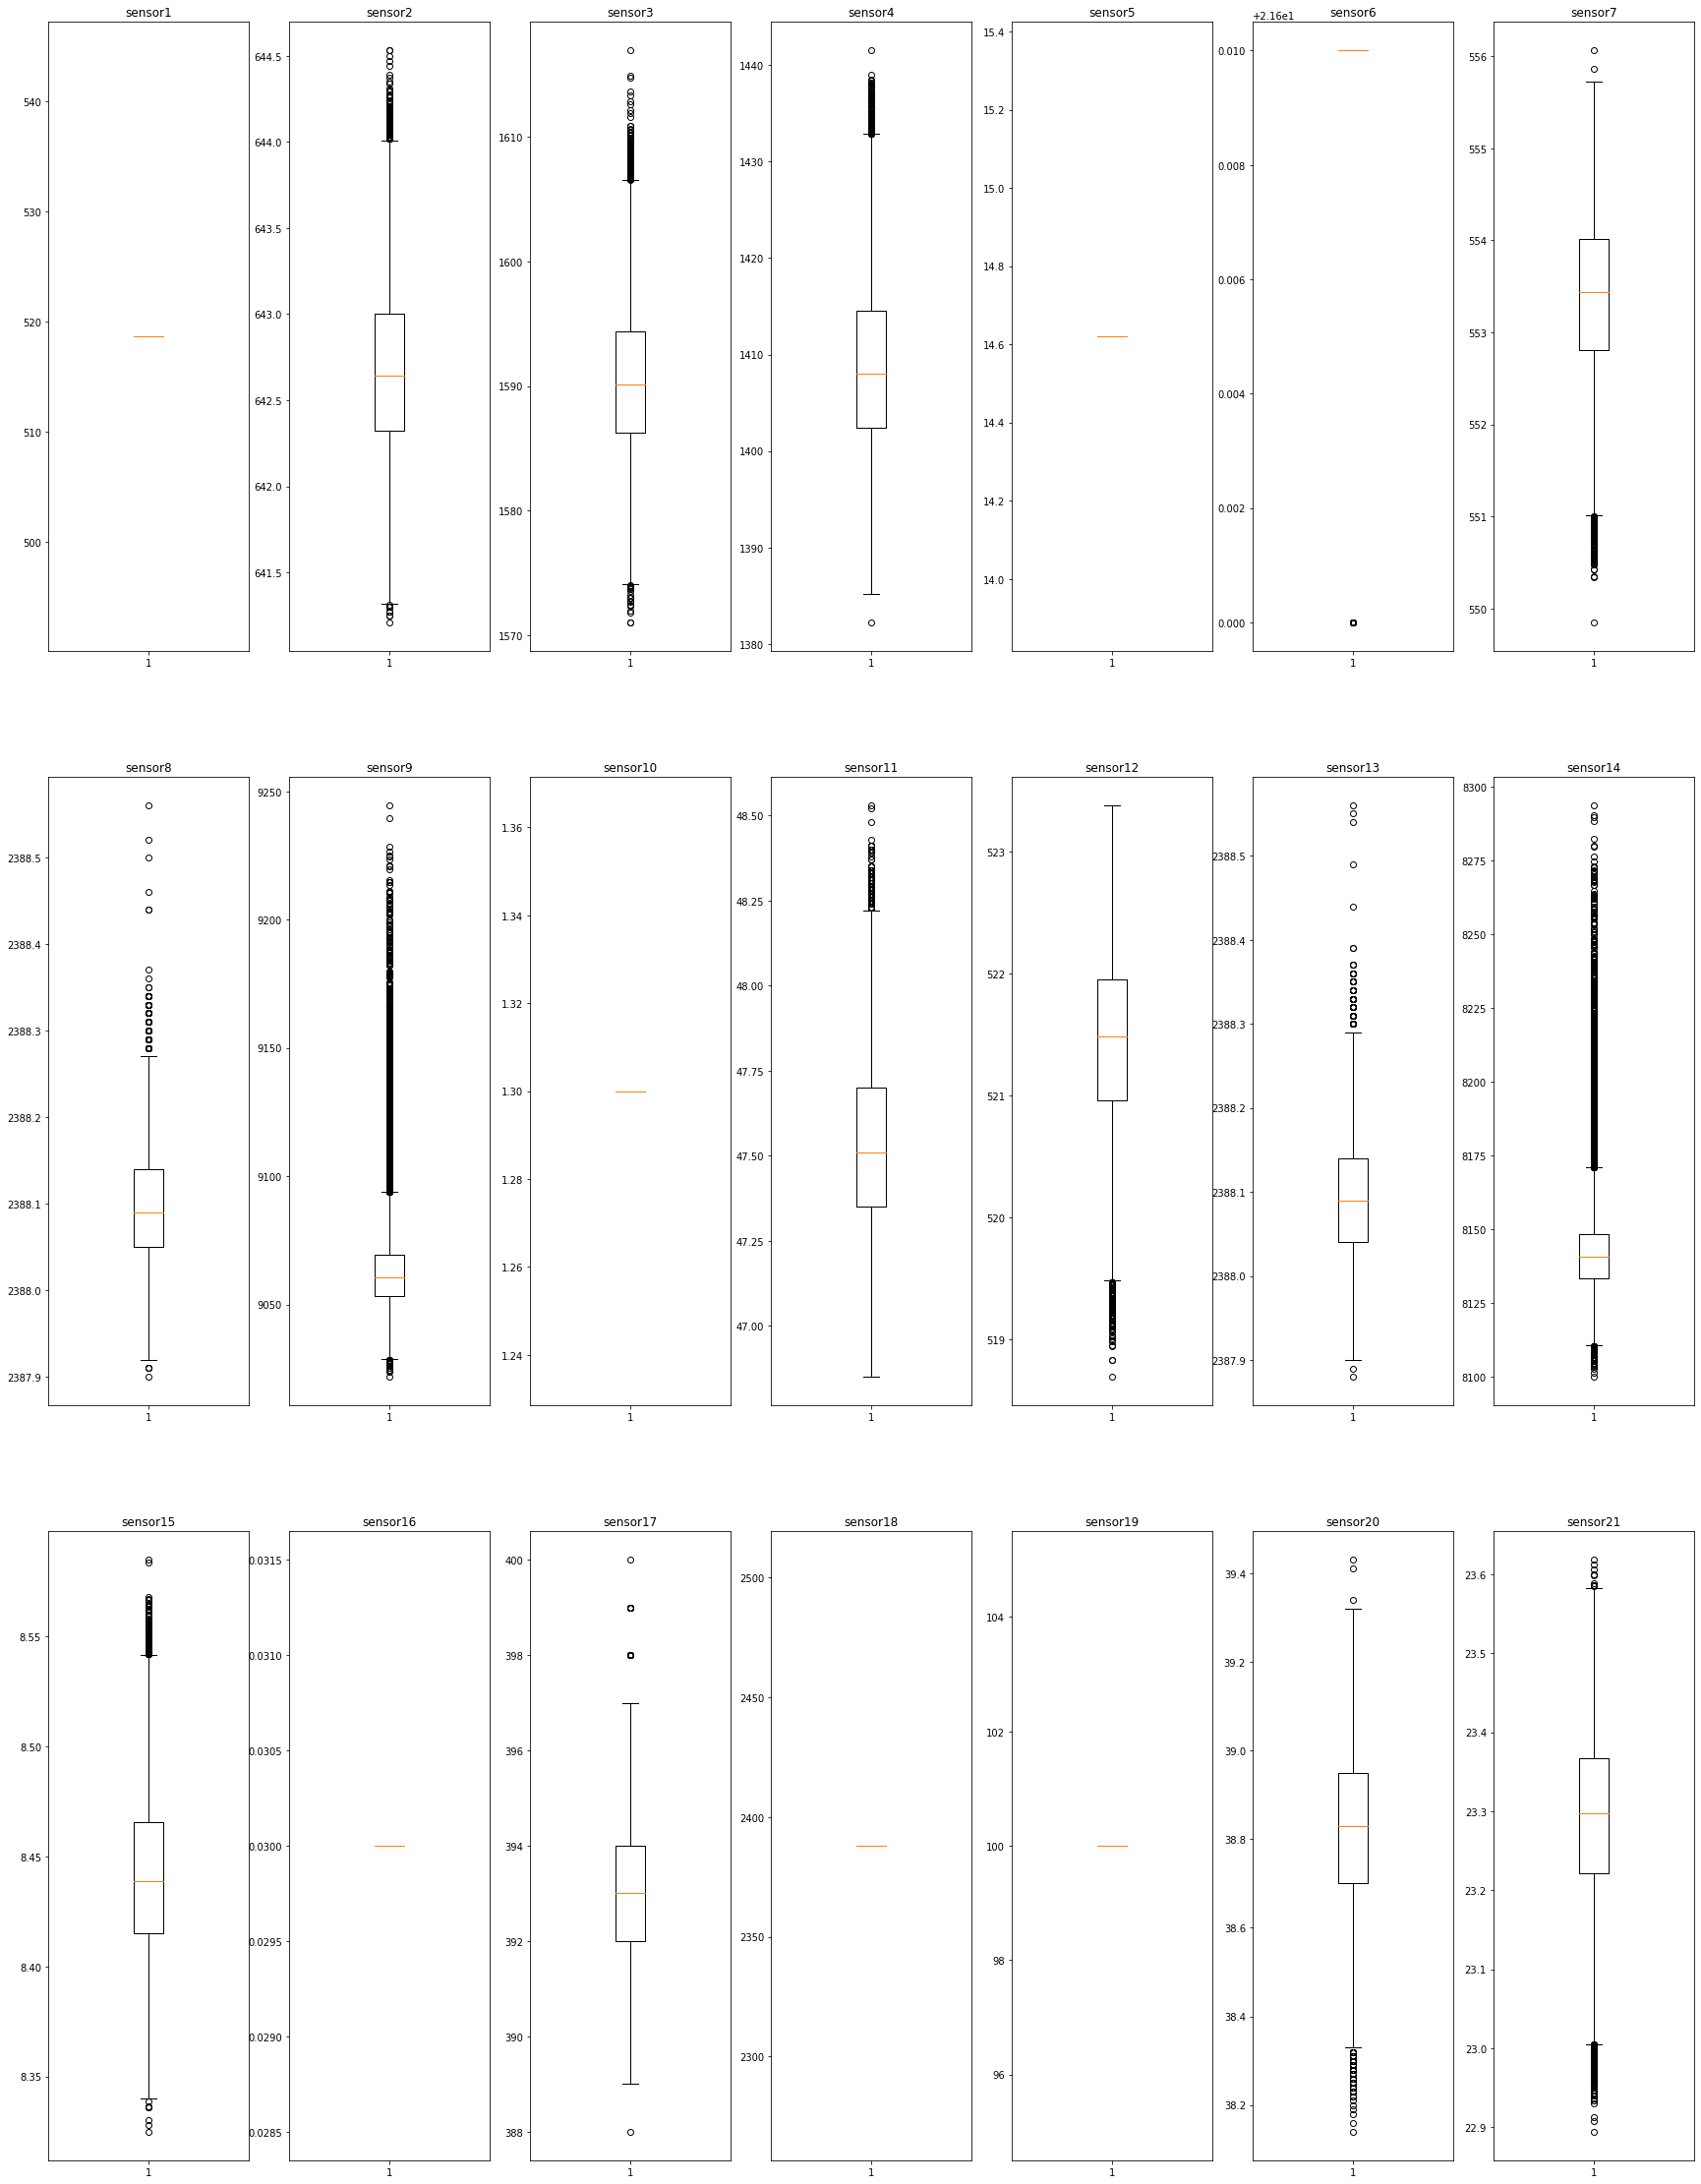

In [ ]:
#plotting box plot
#to compare multiple comlumns we normally use box plot. here we are plotting a box plot using matplotlib. we have plotted in 3 rows and 7 column
#Based on the plot, we need to decide which column we should drop.
plt.figure(figsize = (30, 40))
for i in range(21):
 temp_loc_indexing = df.iloc[:,i+5]
 #setting no of rows and columns for the plot
 plt.subplot(3,7,i+1)
 plt.boxplot(temp_loc_indexing )
 plt.title("sensor"+str(i+1))
plt.show()

From the above box plots, one could identify that sensor number - 1,5,6,10,16,18,19 are having contant values throughout the dataframe which makes them useless for our implementation, so we will drop them.

In [ ]:
df=df.drop(columns=['sensor1', 'sensor5','sensor6','sensor10','sensor16','sensor18','sensor19','opSetting3'])

In [ ]:
df.shape

(20631, 18)

In [ ]:
df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [ ]:
df.dtypes

engineNumber      int64
cycleNumber       int64
opSetting1      float64
opSetting2      float64
sensor2         float64
sensor3         float64
sensor4         float64
sensor7         float64
sensor8         float64
sensor9         float64
sensor11        float64
sensor12        float64
sensor13        float64
sensor14        float64
sensor15        float64
sensor17          int64
sensor20        float64
sensor21        float64
dtype: object

In [ ]:
df_numerical = df.select_dtypes(include=["int","float"])
df_corr = df_numerical.corr()
df_corr

,engineNumber,cycleNumber,opSetting1,opSetting2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
engineNumber,1.000000,0.078753,-0.017895,-0.006197,0.014133,0.012621,0.026116,-0.032073,0.039929,-0.052053,0.024707,-0.031882,0.044230,-0.059473,0.022486,0.013513,-0.020589,-0.016465
cycleNumber,0.078753,1.000000,-0.004527,0.016132,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923
opSetting1,-0.017895,-0.004527,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,-0.004469,0.007652,0.002599,-0.005713,-0.014559
opSetting2,-0.006197,0.016132,0.011660,1.000000,0.007266,0.009068,0.014673,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,-0.006310,0.014156,0.012280,-0.010554,-0.007846
sensor2,0.014133,0.549898,0.009030,0.007266,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
sensor3,0.012621,0.543947,-0.005651,0.009068,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
sensor4,0.026116,0.624577,0.009544,0.014673,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
sensor7,-0.032073,-0.595914,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447
sensor8,0.039929,0.475977,-0.000427,0.013285,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840
sensor9,-0.052053,0.443999,-0.004279,-0.005425,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795


([<matplotlib.axis.YTick at 0x7f6666e52090>,
 [Text(0, 0, 'engineNumber'),
  Text(0, 0, 'cycleNumber'),
  Text(0, 0, 'opSetting1'),
  Text(0, 0, 'opSetting2'),
  Text(0, 0, 'sensor2'),
  Text(0, 0, 'sensor3'),
  Text(0, 0, 'sensor4'),
  Text(0, 0, 'sensor7'),
  Text(0, 0, 'sensor8'),
  Text(0, 0, 'sensor9'),
  Text(0, 0, 'sensor11'),
  Text(0, 0, 'sensor12'),
  Text(0, 0, 'sensor13'),
  Text(0, 0, 'sensor14'),
  Text(0, 0, 'sensor15'),
  Text(0, 0, 'sensor17'),
  Text(0, 0, 'sensor20'),
  Text(0, 0, 'sensor21')])

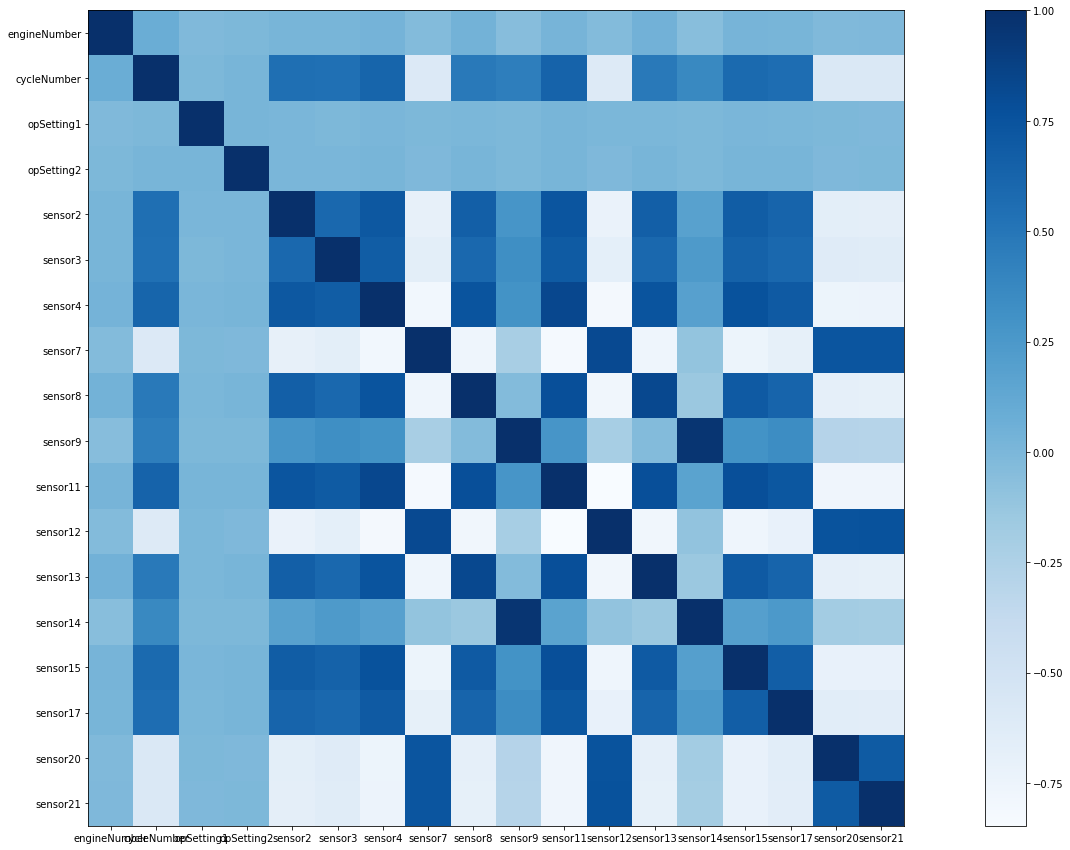

In [ ]:
# Heat Map for visualizing Correlation among variables
plt.figure(figsize = (29,15))
plt.imshow(df_corr, cmap ="Blues")
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.index)

From the above heat map of the data correlation, we can identify that the coulmn- **engine number, operational setting 2 and operational setting 3** poorly correlate with the other columns so we can drop these columns

In [ ]:
df=df.drop(columns=['engineNumber',	'opSetting1',	'opSetting2'])

In [ ]:
df.shape

(20631, 15)

In [ ]:
df.head()

,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [ ]:
df_numerical = df.select_dtypes(include=["int","float"])
df_corr = df_numerical.corr()
df_corr.head()

,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
cycleNumber,1.000000,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923
sensor2,0.549898,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
sensor3,0.543947,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
sensor4,0.624577,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
sensor7,-0.595914,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447


([<matplotlib.axis.YTick at 0x7f666978bfd0>,
 [Text(0, 0, 'cycleNumber'),
  Text(0, 0, 'sensor2'),
  Text(0, 0, 'sensor3'),
  Text(0, 0, 'sensor4'),
  Text(0, 0, 'sensor7'),
  Text(0, 0, 'sensor8'),
  Text(0, 0, 'sensor9'),
  Text(0, 0, 'sensor11'),
  Text(0, 0, 'sensor12'),
  Text(0, 0, 'sensor13'),
  Text(0, 0, 'sensor14'),
  Text(0, 0, 'sensor15'),
  Text(0, 0, 'sensor17'),
  Text(0, 0, 'sensor20'),
  Text(0, 0, 'sensor21')])

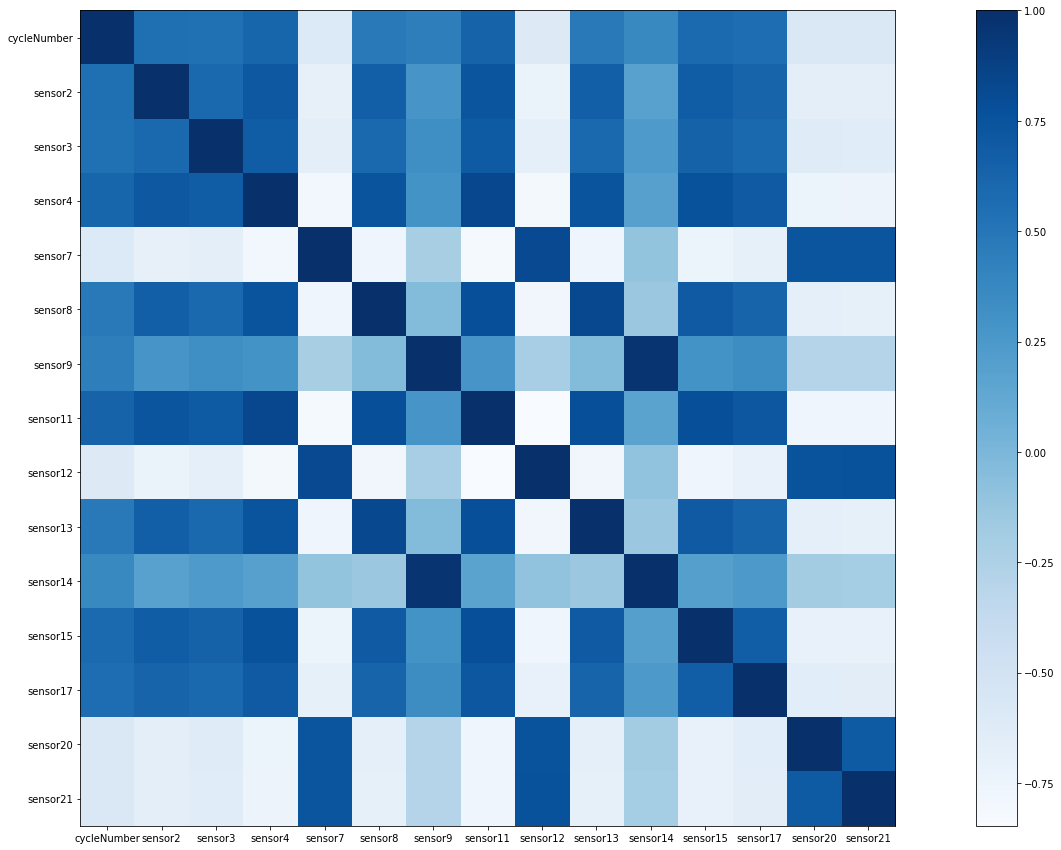

In [ ]:
# Heat Map for visualizing Correlation among variables
plt.figure(figsize = (29,15))
plt.imshow(df_corr, cmap ="Blues")
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.index)

In [ ]:
# Scaling to bring numerical column values to same scale using MinMaxScaler
df_numerical = df[["cycleNumber","sensor2", "sensor3","sensor4","sensor7","sensor8","sensor9","sensor11","sensor12","sensor13","sensor14","sensor15", "sensor17","sensor20","sensor21"]]
scaler = MinMaxScaler()
scaled_df_numerical = scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(np.round(scaled_df_numerical,15), 
  columns=["cycleNumber","sensor2", "sensor3","sensor4","sensor7","sensor8","sensor9","sensor11","sensor12","sensor13","sensor14","sensor15", "sensor17","sensor20","sensor21"])
df['cycleNumber'] = df_numerical['cycleNumber']
df['sensor2'] = df_numerical['sensor2']
df['sensor3'] = df_numerical['sensor3']
df['sensor4'] = df_numerical['sensor4']
df['sensor7'] = df_numerical['sensor7']
df['sensor8'] = df_numerical['sensor8']
df['sensor9'] = df_numerical['sensor9']
df['sensor11'] = df_numerical['sensor11']
df['sensor12'] = df_numerical['sensor12']
df['sensor13'] = df_numerical['sensor13']
df['sensor14'] = df_numerical['sensor14']
df['sensor15'] = df_numerical['sensor15']
df['sensor17'] = df_numerical['sensor17']
df['sensor20'] = df_numerical['sensor20']
df['sensor21'] = df_numerical['sensor21']
df.head()

,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,0.00000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.00277,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.00554,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.00831,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.01108,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502


In [ ]:
df.shape

(20631, 15)